In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from scipy.stats import zscore

In [3]:
custData = pd.read_csv('Cust_Spend_Data.csv')
custData.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [4]:
custDataattr = custData.iloc[: , 2:]
custDataattr.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [5]:
custdatascaled = custDataattr.apply(zscore)
custdatascaled

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


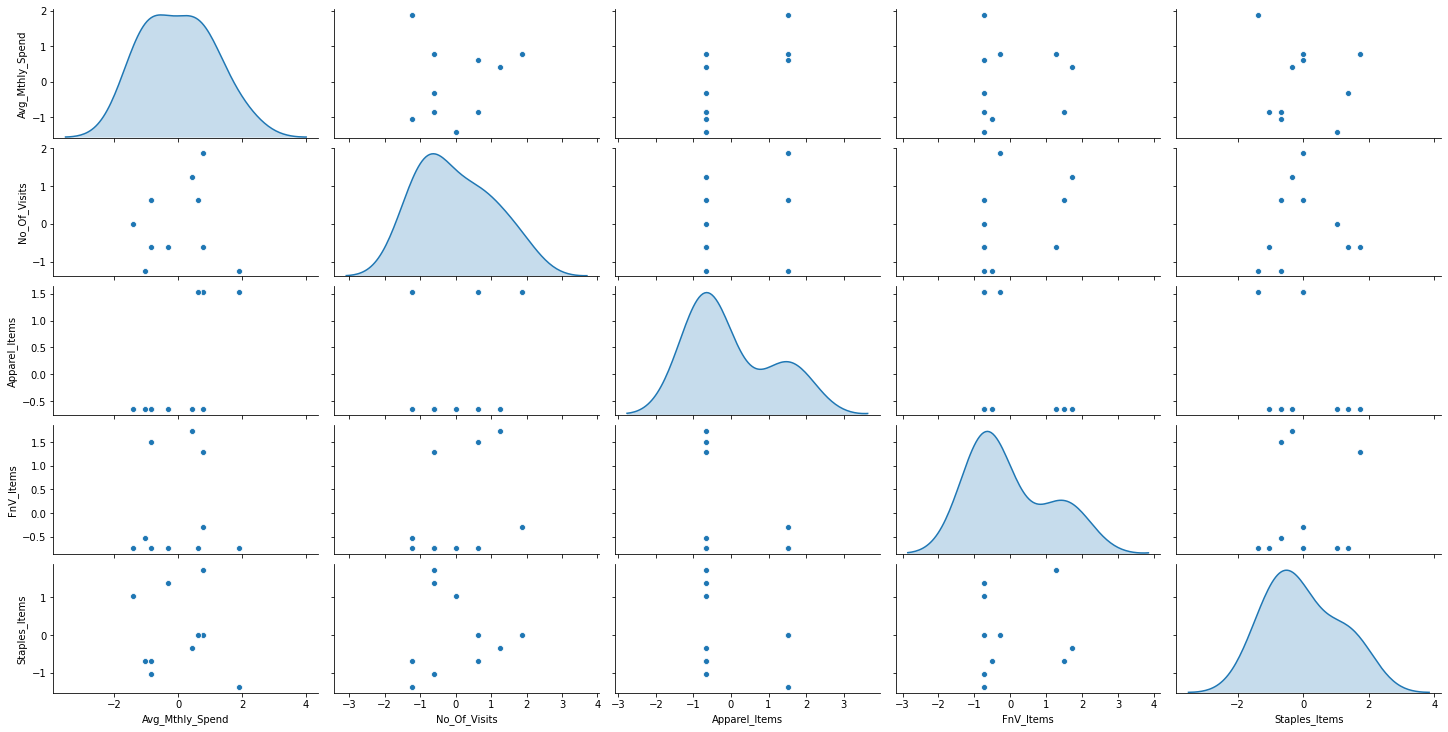

In [6]:
sns.pairplot(custdatascaled , height = 2, aspect = 2 , diag_kind = 'kde')

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
model = AgglomerativeClustering(n_clusters = 3 , affinity = 'euclidean' , linkage = 'average')

In [9]:
model.fit(custdatascaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [10]:
#model.labels_ is used to see the clusters made
#here 3 clusters are made
custDataattr['labels'] = model.labels_
custDataattr.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [11]:
custDataattr[custDataattr['labels'] == 0]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0


In [12]:
custDataattr[custDataattr['labels'] == 1]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
1,7000,3,0,10,9,1
4,6000,6,0,12,3,1
6,2500,5,0,11,2,1


In [13]:
custDataattr[custDataattr['labels'] == 2]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
5,4000,3,0,1,8,2
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [14]:
custdataclust = custDataattr.groupby(['labels'])
custdataclust.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [15]:
from scipy.cluster.hierarchy import cophenet , dendrogram , linkage

In [16]:
from scipy.spatial.distance import pdist

In [17]:
#cophenet is used to measure the efficiency of dendrogram
#dendrogram is  a diagram that shows the hierarchical relationship between objects.
#pdist is pair wise distance between values

In [18]:
z = linkage(custdatascaled , metric = 'euclidean' , method  = 'average')

In [19]:
c , coph_dists = cophenet(z , pdist(custdatascaled))
c

0.8681149436293064

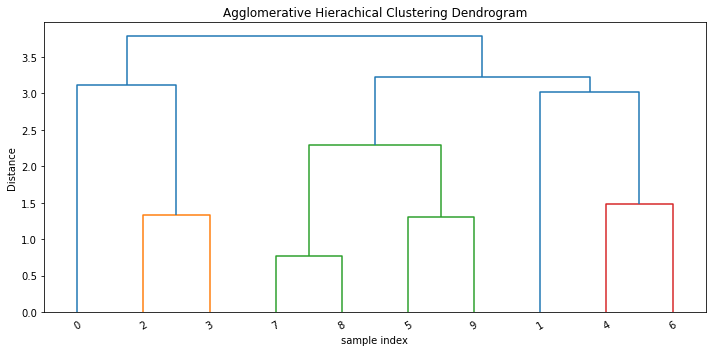

In [20]:
plt.figure(figsize = (10,5))
plt.title('Agglomerative Hierachical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z , leaf_rotation = 30 , leaf_font_size = 10)
plt.tight_layout()

In [21]:
z = linkage(custdatascaled , metric = 'euclidean' , method  = 'ward')

In [22]:
c , coph_dists = cophenet(z , pdist(custdatascaled))
c

0.8453818941339526

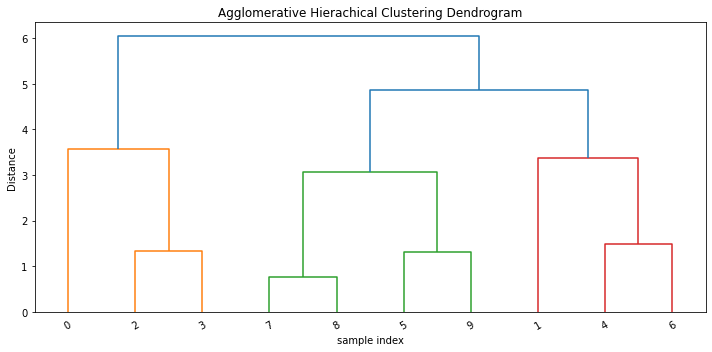

In [23]:
plt.figure(figsize = (10,5))
plt.title('Agglomerative Hierachical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z , leaf_rotation = 30 , leaf_font_size = 10)
plt.tight_layout()